
目的：ある検査値を利用し、罹患のありなしのカットオフ値を求め、正常値を求める。


In [ ]:
import pandas as pd

test02 = pd.read_csv("test02.csv") 
test02.head()

基本的な統計量

In [ ]:
test02.describe()

各列間の相関係数を算出

'pearson': ピアソンの積率相関係数（デフォルト）

'kendall': ケンドールの順位相関係数

'spearman': スピアマンの順位相関係数


0～0.3未満：ほぼ無関係、0.3～0.5未満：非常に弱い相関、0.5～0.7未満：相関がある、0.7～0.9未満：強い相関、0.9以上：非常に強い相関

In [40]:
#test02.corr()

所見有を教師データとして一つの変数でのカットオフ値を計算してみる

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report, roc_curve
import sklearn.metrics as metrics


import numpy as np
import matplotlib.pyplot as plt


X_train = test02.loc[:,"変数"]
y_train = test02.loc[:,"所見有"]

X_train = X_train.values
y_train = y_train.values

X_train = X_train.reshape(-1,1)
#y_train = y_train.reshape(-1,1)



LogisticRegression, auc:0.521439594356261
DecisionTreeClassifier, auc:0.9710648148148148
KNeighborsClassifier, auc:0.7609126984126984
GaussianNB, auc:0.5086529982363316


Text(0, 0.5, 'TPR: True Positive Rete')

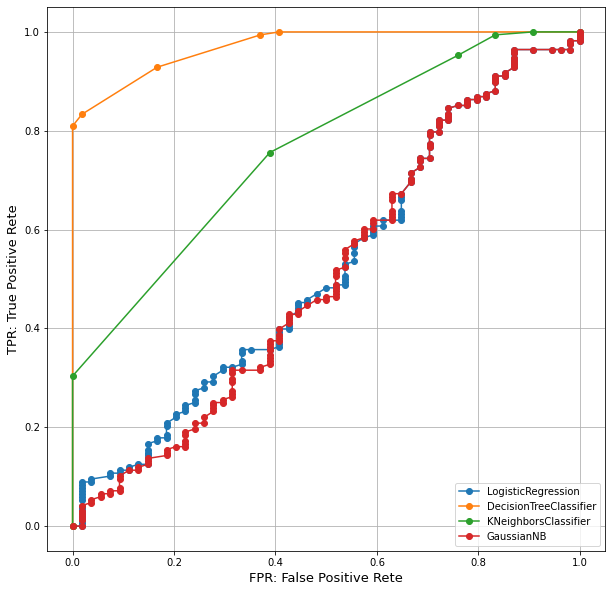

In [ ]:
# 分類モデル初期化
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB()
]

# 学習
models = [model.fit(X_train, y_train) for model in models]

cutoff_criterions = list()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for model in models:
    model_name = model.__class__.__name__
    fpr, tpr, thres = roc_curve(y_train, model.predict_proba(X_train)[:, 1],drop_intermediate=False)
    auc = metrics.auc(fpr, tpr)
    # 特異度
    sng = 1 - fpr
    # Youden indexを用いたカットオフ基準
    cutoff_criterion = tpr + sng - 1
    cutoff_criterions.append(cutoff_criterion)
    print(f'{model_name}, auc:{auc}')
    ax.plot(fpr, tpr, marker='o', label=model_name)    
ax.legend()
ax.grid()
ax.set_xlabel('FPR: False Positive Rete', fontsize = 13)
ax.set_ylabel('TPR: True Positive Rete', fontsize = 13)

In [20]:
#以下、DecisionTreeClassifierについて
cov = np.argmax(cutoff_criterions[1])
cutoffv = cutoff_criterions[1][cov]

https://di-acc2.com/programming/python/6589/

In [42]:
y_pred = models[1].predict_proba(X_train)
mask = (y_pred[:,1] >= cutoffv)
pred = mask.astype(np.int64)
#print(accuracy_score(y_train, pred))
#print(precision_score(y_train, pred))
#print(recall_score(y_train, pred))
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        54
           1       1.00      0.81      0.89       168

    accuracy                           0.86       222
   macro avg       0.81      0.90      0.83       222
weighted avg       0.91      0.86      0.86       222



In [49]:
print(np.count_nonzero(pred == 1))

136


試しにサポートベクターマシン

In [36]:
from sklearn.svm import LinearSVC  # SVC: Support Vector Classification
from sklearn.svm import SVC

model_svc = SVC() 
model_svc.fit(X_train, y_train) 
y_score = model_svc.predict(X_train)
print(y_score) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
